# Importing Libraries

In [2]:
# Code by Azzedine & Aziz
# import of all required libraries.

import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For visualization
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LinearRegression  # linear regression
from sklearn.ensemble import RandomForestRegressor  # random forest
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation
from sklearn.preprocessing import LabelEncoder # For label encoding (workout exercice and gender are not numerical value)


sns.set_theme(style="whitegrid")


# Data Collection

In [3]:
# Code by Aziz & Azzedine

data_path = 'G6_gym_members_exercise_tracking.csv'
df = pd.read_csv(data_path)

# Display first rows to test
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


# Data Cleaning

In [4]:
# Code by Aziz

# Check the number of rows and columns in the dataset
print("Dataset shape:", df.shape)

# We recover those parameter : column type Count Dtype  
print("\nData info:")
print(df.info())

# check if there missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# displays some useful math stats (Q1 Q3 median etc)
print("\nDescriptive statistics:")
display(df.describe())

# erase duplicate
initial_count = df.shape[0]
df.drop_duplicates(inplace=True)
after_drop_count = df.shape[0]
print(f"\nNumber of dropped duplicates: {initial_count - after_drop_count}")


Dataset shape: (973, 15)

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequ

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000



Number of dropped duplicates: 0


# Data Preparation

In [5]:
# Code by Azzedine

# Data cleaning : Checking data consistency
missing_vals = df.isnull().sum()
if missing_vals.any():
    # For the double check, delete the nule values.
    df.dropna(inplace=True)
    print("Rows with missing values have been dropped.")
else:
    print("No missing values to handle.")

# Creation of instance so we can convert workout to numerical value
workout_encoder = LabelEncoder()
df["Workout_Type_Encoded"] = workout_encoder.fit_transform(df["Workout_Type"])

print("Workout Type classes and their numeric encodings:")
for class_label, numeric_label in zip(workout_encoder.classes_, range(len(workout_encoder.classes_))):
    print(f"{class_label} -> {numeric_label}")


gender_encoder = LabelEncoder()
df["Gender_Encoded"] = gender_encoder.fit_transform(df["Gender"])

print("\nGender classes and their numeric encodings:")
for class_label, numeric_label in zip(gender_encoder.classes_, range(len(gender_encoder.classes_))):
    print(f"{class_label} -> {numeric_label}")




No missing values to handle.
Workout Type classes and their numeric encodings:
Cardio -> 0
HIIT -> 1
Strength -> 2
Yoga -> 3

Gender classes and their numeric encodings:
Female -> 0
Male -> 1


# Exploratory Data Analysis (EDA)

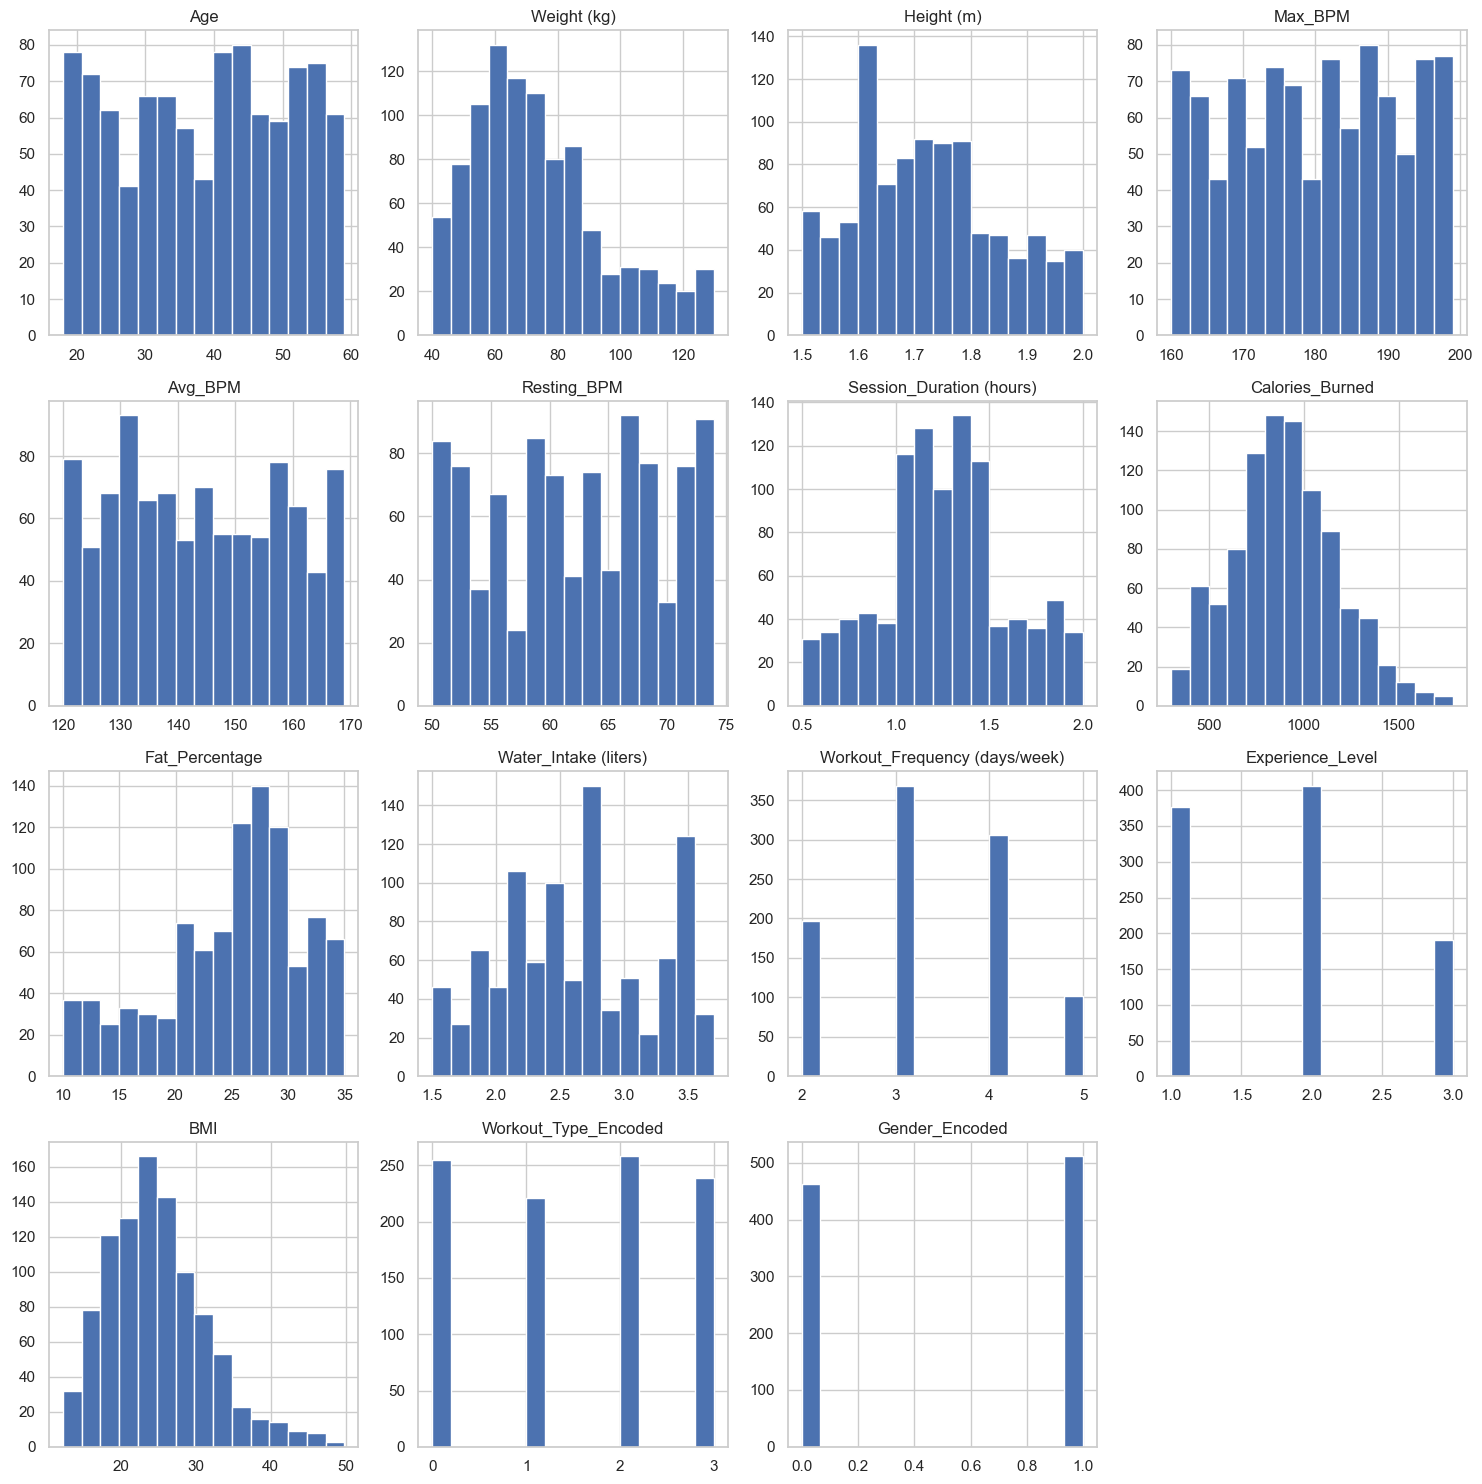

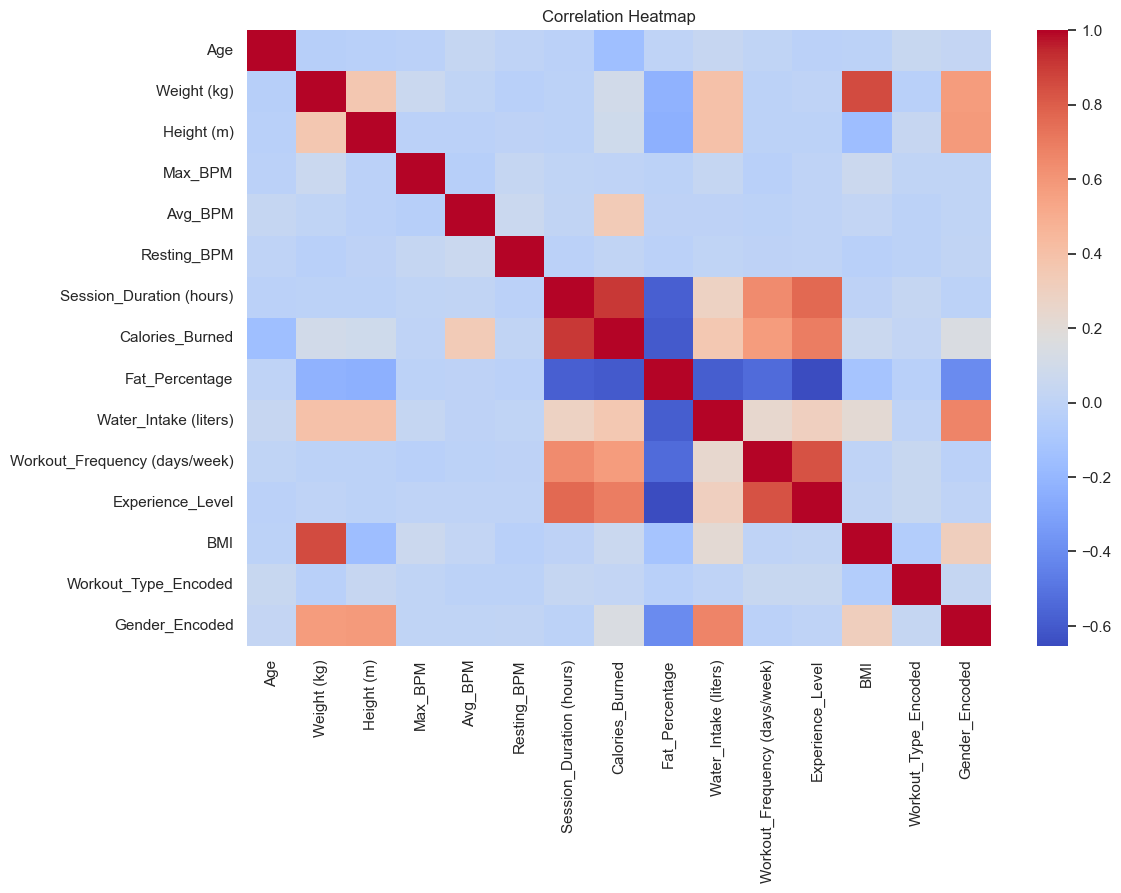

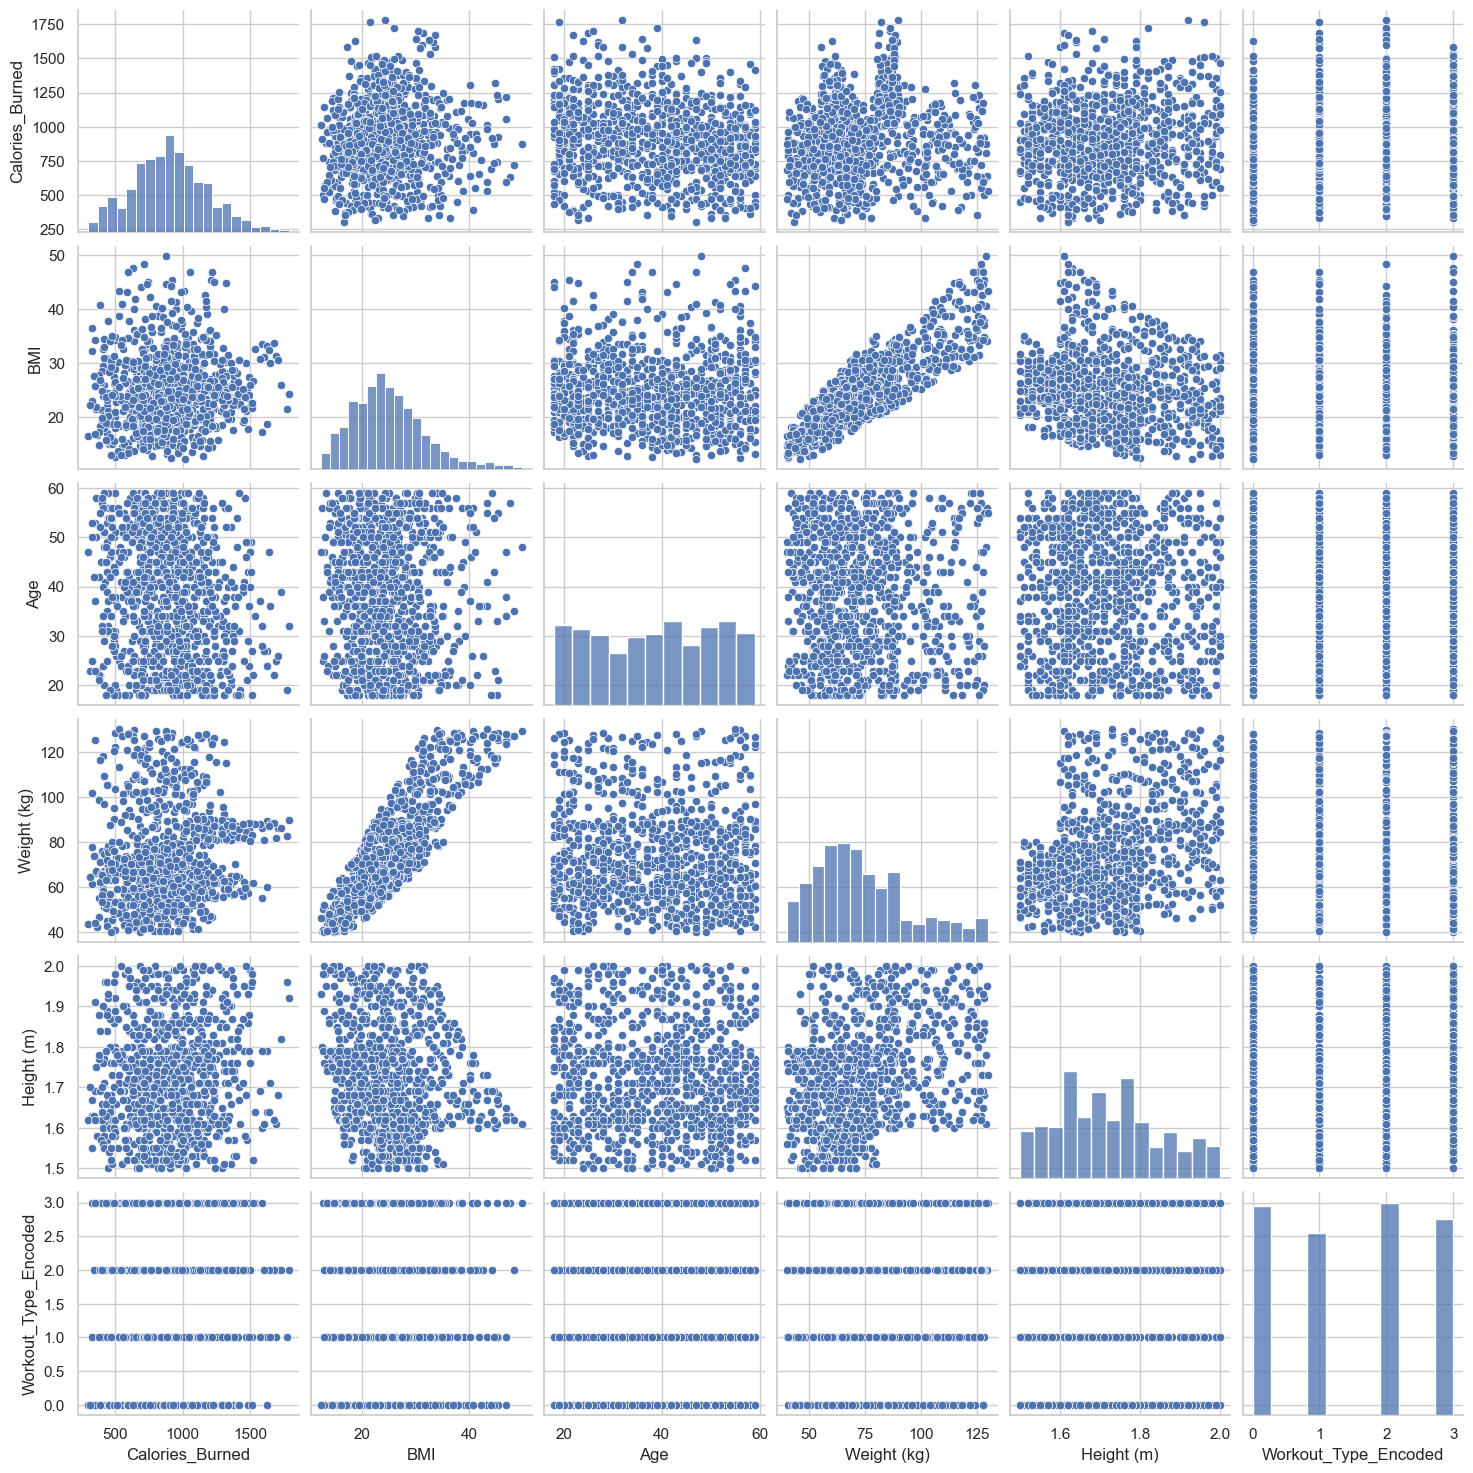

In [6]:
# Code by Azzedine

# histogram creation
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].hist(figsize=(15,15), bins=15)
plt.tight_layout()
plt.show()

# heatmap creation
plt.figure(figsize=(12,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# relationship between our table
cols_of_interest = ['Calories_Burned', 'BMI', 'Age', 'Weight (kg)', 'Height (m)', 'Workout_Type_Encoded']
sns.pairplot(df[cols_of_interest])
plt.show()

# these data will allow us to verify which parameters have the greatest impact on calorie loss.


# Selection for modeling

In [7]:
# Code by Azzedine


# here's the target we're looking to analyze
target = 'Calories_Burned'

df_model = df.drop(columns=[target, "Workout_Type", "Gender"])

X = df_model.select_dtypes(include=np.number)
y = df[target]

print("Features used for modeling:", X.columns.to_list())
print("Target:", target)



Features used for modeling: ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Workout_Type_Encoded', 'Gender_Encoded']
Target: Calories_Burned


# Data Train and Test Sets

In [8]:
# Code by Aziz

# We split the data into train and test sets, typically 80/20 (80 for training 20 for testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (778, 14)
Test set size: (195, 14)


# Data Scaling 

In [9]:
# Code by Aziz

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Section 9 - Modeling (Regression + Random Forest)

In [10]:
# Code by Azzedine & Aziz
# we are using 2 models so i can double check the output

# Linear Regression :
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("MSE:", mse_lr)
print("R²:", r2_lr)

# Random Forest :
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print("MSE:", mse_rf)
print("R²:", r2_rf)


Linear Regression Performance:
MSE: 1639.9102084997235
R²: 0.9803427065691752

Random Forest Performance:
MSE: 2291.6672574358977
R²: 0.9725302181230744


# Conclusion

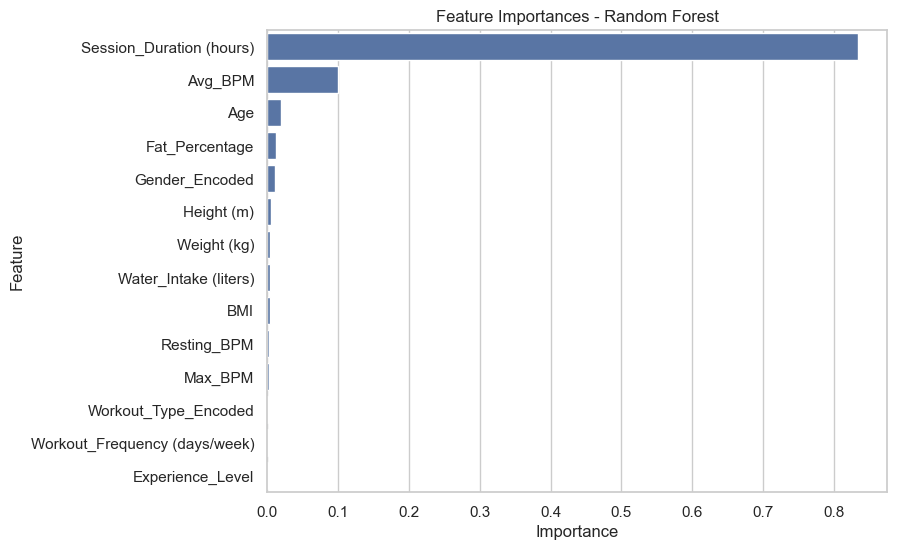

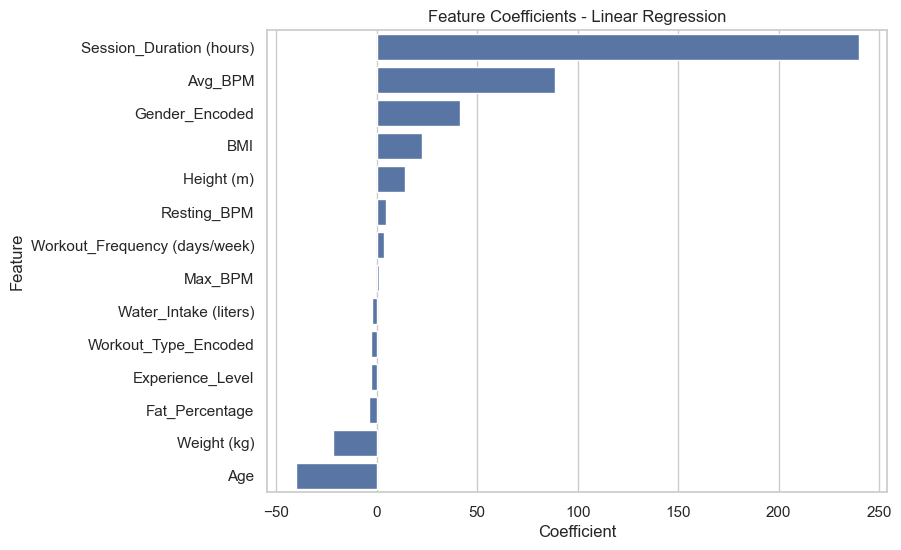

In [11]:
# code by Aziz


# Random Forest :

importance = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importances - Random Forest")
plt.show()


# code by Azzed 

# Linear Regression
feature_names = X.columns

coeffs = lr_model.coef_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coeffs
})

# If it's negative, it means that the parameter works against you.
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Coefficient', y='Feature')
plt.title("Feature Coefficients - Linear Regression")
plt.show()


In [12]:
# Code by Azzedine & Aziz (extended to try 100 experiences)


# Lists to store results
mse_lr_list = []
r2_lr_list = []
mse_rf_list = []
r2_rf_list = []

# 100 times experiment
for i in range(100):
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
        X, y,
        test_size=0.2,
        random_state=i
    )
    
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled_temp = scaler.fit_transform(X_train_temp)
    X_test_scaled_temp = scaler.transform(X_test_temp)
    
    # Train Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled_temp, y_train_temp)
    y_pred_lr_temp = lr_model.predict(X_test_scaled_temp)
    
    # Compute metrics
    mse_lr_list.append(mean_squared_error(y_test_temp, y_pred_lr_temp))
    r2_lr_list.append(r2_score(y_test_temp, y_pred_lr_temp))
    
    # Train Random Forest
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled_temp, y_train_temp)
    y_pred_rf_temp = rf_model.predict(X_test_scaled_temp)
    
    # Compute metrics
    mse_rf_list.append(mean_squared_error(y_test_temp, y_pred_rf_temp))
    r2_rf_list.append(r2_score(y_test_temp, y_pred_rf_temp))

# Calculate average and standard deviation for each metric
avg_mse_lr = np.mean(mse_lr_list)
std_mse_lr = np.std(mse_lr_list)
avg_r2_lr = np.mean(r2_lr_list)
std_r2_lr = np.std(r2_lr_list)

avg_mse_rf = np.mean(mse_rf_list)
std_mse_rf = np.std(mse_rf_list)
avg_r2_rf = np.mean(r2_rf_list)
std_r2_rf = np.std(r2_rf_list)

print("Linear Regression (100 runs)")
print(f"MSE: {avg_mse_lr:.2f} ± {std_mse_lr:.2f}")
print(f"R² : {avg_r2_lr:.4f} ± {std_r2_lr:.4f}")

print("Random Forest (100 runs)")
print(f"MSE: {avg_mse_rf:.2f} ± {std_mse_rf:.2f}")
print(f"R² : {avg_r2_rf:.4f} ± {std_r2_rf:.4f}")


Linear Regression (100 runs)
MSE: 1618.37 ± 200.13
R² : 0.9781 ± 0.0023
Random Forest (100 runs)
MSE: 1972.40 ± 312.38
R² : 0.9732 ± 0.0043
